In [1]:
%matplotlib inline


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import scatter_matrix
from pathlib import Path
from pprint import pprint

In [4]:
# Load csv file Resources/homelesess_2012_2022.xlsx
file_path_rental = Path('../Resources/Rental_USA_csv.csv')
# Read the csv file
rental_df = pd.read_csv(file_path_rental)
# Display data
rental_df.head()


,price,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,State,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
1,AK,1745,1856,1908,1909,1957,1940,1903,1900,1967,2016,1990,2340,2420
2,AL,1003,947,945,1022,1103,958,1016,1007,1042,1068,1054,1240,1282
3,AR,809,850,929,953,1075,1045,1081,1083,1121,1149,1134,1334,1379
4,AZ,1218,1162,1201,1210,1222,1227,1260,1263,1307,1340,1323,1556,1609


In [5]:
# Load csv file Resources/homelesess_2012_2022.csv
file_path_hud = Path('../Resources/homelesess_2012_2022.csv')
# Read the csv file
homelesess_df = pd.read_csv(file_path_hud)
# Display data
homelesess_df.head()


,State,"Overall Homeless, 2022","Overall Homeless, 2021","Overall Homeless, 2020","Overall Homeless, 2019","Overall Homeless, 2018","Overall Homeless, 2017","Overall Homeless, 2016","Overall Homeless, 2015","Overall Homeless, 2014","Overall Homeless, 2013","Overall Homeless, 2012"
0,AK,"2,320","1,949","1,949","1,907","2,016","1,845","1,940","1,956","1,784","1,946","1,913"
1,AL,"3,752","2,556","3,351","3,261","3,434","3,793","4,111","3,970","4,561","4,689","5,209"
2,AR,"2,459","2,139","2,366","2,717","2,712","2,467","2,463","2,560","2,936","3,812","4,214"
3,AS,,,,,,,,,,,
4,AZ,"13,553","5,460","10,979","10,007","9,865","8,947","9,707","9,896","10,495","10,562","11,302"


In [6]:
#Changing the type for all columns exept State
# Specify the column to keep as object
object_column = 'price'

# Convert all values to float except the specified object column
rental_df_clean = rental_df.replace(',','', regex = True)
rental_df_clean.loc[:, rental_df_clean.columns != object_column] = rental_df_clean.loc[:, rental_df_clean.columns != object_column].apply(pd.to_numeric, errors='coerce')

In [7]:
condition = (homelesess_df['State'] != 'AS')
# Use boolean indexing to select and keep rows that satisfy the condition
homelesess_df_clean = homelesess_df[condition]

#Changing the type for all columns exept State
# Specify the column to keep as object
object_column = 'State'

# Convert all values to float except the specified object column
homelesess_df_clean = homelesess_df_clean.replace(',','', regex = True)
homelesess_df_clean.loc[:, homelesess_df_clean.columns != object_column] = homelesess_df_clean.loc[:, homelesess_df_clean.columns != object_column].apply(pd.to_numeric, errors='coerce')
homelesess_df_clean.head()

,State,"Overall Homeless, 2022","Overall Homeless, 2021","Overall Homeless, 2020","Overall Homeless, 2019","Overall Homeless, 2018","Overall Homeless, 2017","Overall Homeless, 2016","Overall Homeless, 2015","Overall Homeless, 2014","Overall Homeless, 2013","Overall Homeless, 2012"
0,AK,2320,1949,1949,1907,2016,1845,1940,1956,1784,1946,1913
1,AL,3752,2556,3351,3261,3434,3793,4111,3970,4561,4689,5209
2,AR,2459,2139,2366,2717,2712,2467,2463,2560,2936,3812,4214
4,AZ,13553,5460,10979,10007,9865,8947,9707,9896,10495,10562,11302
5,CA,171521,57468,161548,151278,129972,131532,118142,115738,113952,118552,120098


In [8]:
#Renaming columns
rental_df_clean = rental_df_clean.rename(columns={'Unnamed: 12' : 'rental_2021', 'Unnamed: 13': 'rental_2022',
       'Unnamed: 3' : 'rental_2012', 'Unnamed: 4' : 'rental_2013',
       'Unnamed: 5' : 'rental_2014', 'Unnamed: 6' : 'rental_2015',
       'Unnamed: 7' : 'rental_2016', 'Unnamed: 8' : 'rental_2017',
       'Unnamed: 9' : 'rental_2018', 'Unnamed: 10' : 'rental_2019',
       'Unnamed: 11': 'rental_2020','price': 'State' })


In [9]:
#Deleting data not needed
del rental_df_clean['Unnamed: 1']
del rental_df_clean['Unnamed: 2']
rental_df_clean = rental_df_clean.drop(0)
rental_df_clean.head()

,State,rental_2012,rental_2013,rental_2014,rental_2015,rental_2016,rental_2017,rental_2018,rental_2019,rental_2020,rental_2021,rental_2022
1,AK,1908,1909,1957,1940,1903,1900,1967,2016,1990,2340,2420
2,AL,945,1022,1103,958,1016,1007,1042,1068,1054,1240,1282
3,AR,929,953,1075,1045,1081,1083,1121,1149,1134,1334,1379
4,AZ,1201,1210,1222,1227,1260,1263,1307,1340,1323,1556,1609
5,CA,2031,2132,2237,2345,2465,2469,2555,2619,2585,3040,3143


Enter the year in a range 2012 - 2022:  2022


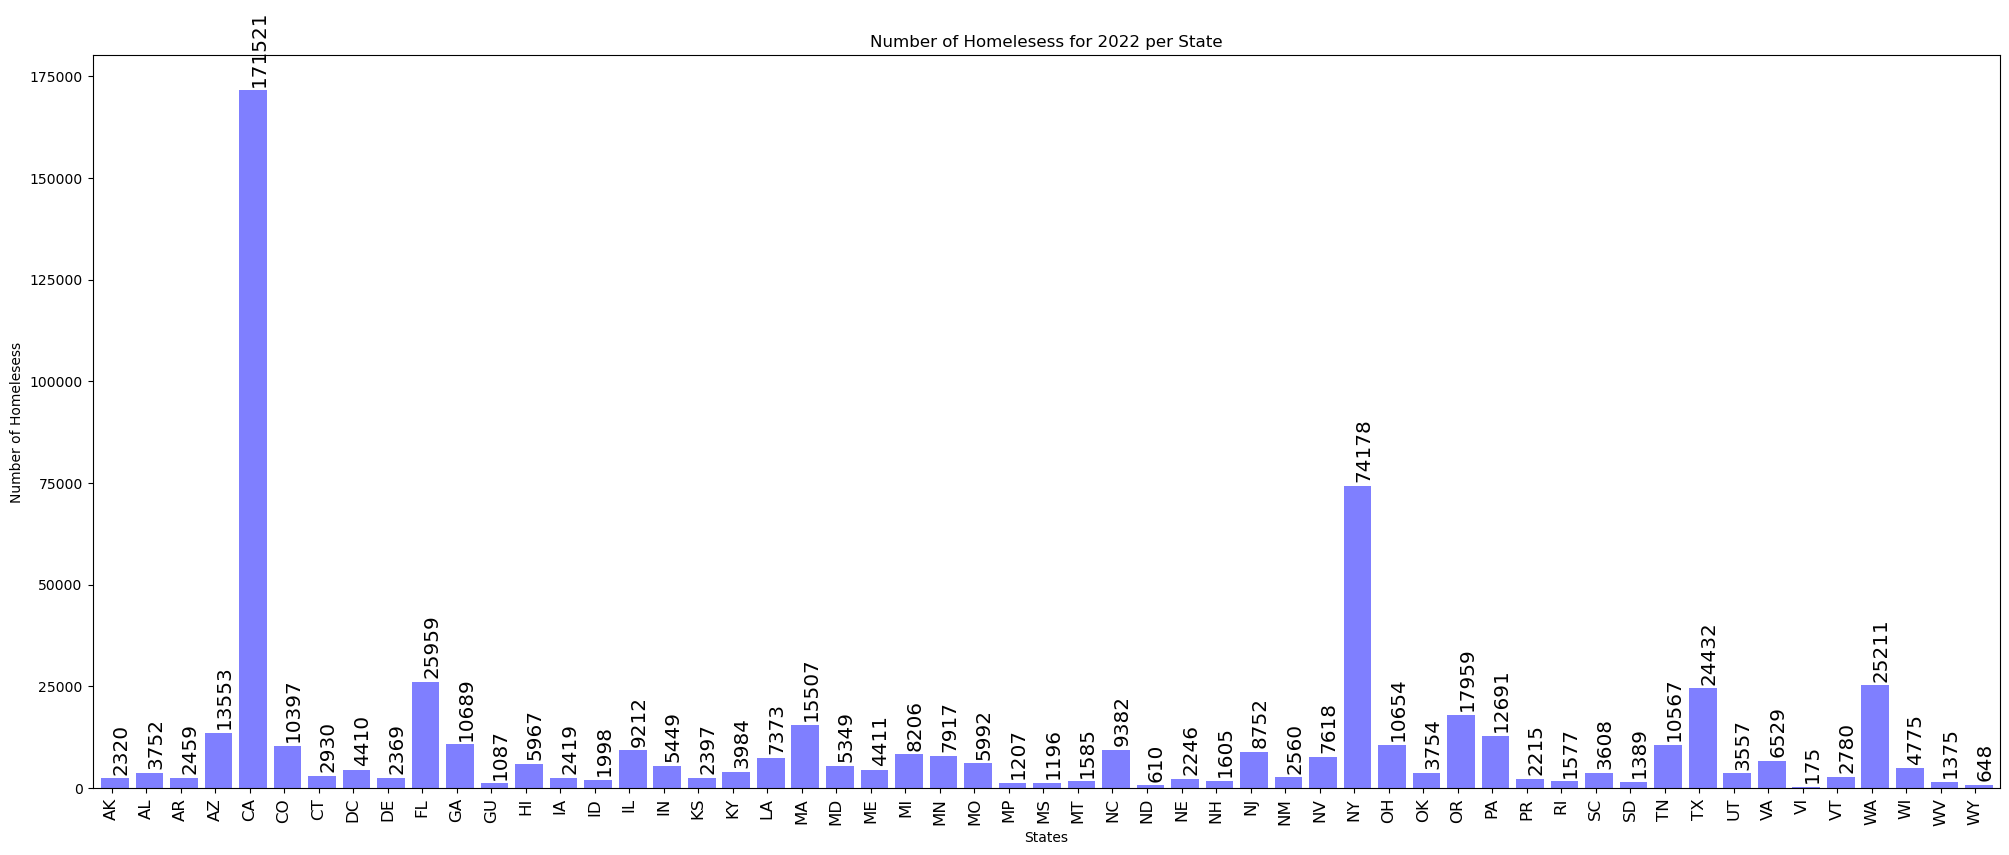

In [10]:
x_axis = np.arange(len(homelesess_df_clean))
value_for_year = input("Enter the year in a range 2012 - 2022: ")
year_value = "Overall Homeless, " + value_for_year
tick_locations = [value + 0.3 for value in x_axis]
plt.figure(figsize=(20,8))
plt.xlim(-0.25, len(x_axis))
plt.bar(x_axis, homelesess_df_clean[year_value], color='b', alpha=0.5, align="edge")
plt.xticks(tick_locations , homelesess_df_clean["State"],rotation="vertical",size = 'large')
plt.tight_layout()
y = homelesess_df_clean[year_value]
for index, value in enumerate(y):
    plt.text(index + 0.3, value + 2000,
             str(value), size = 'x-large',rotation="vertical")
plt.title(f"Number of Homelesess for {value_for_year} per State")
plt.xlabel("States")
plt.ylabel("Number of Homelesess")
plt.savefig("../Outputs/HUD_bar_chat.png")
plt.show()

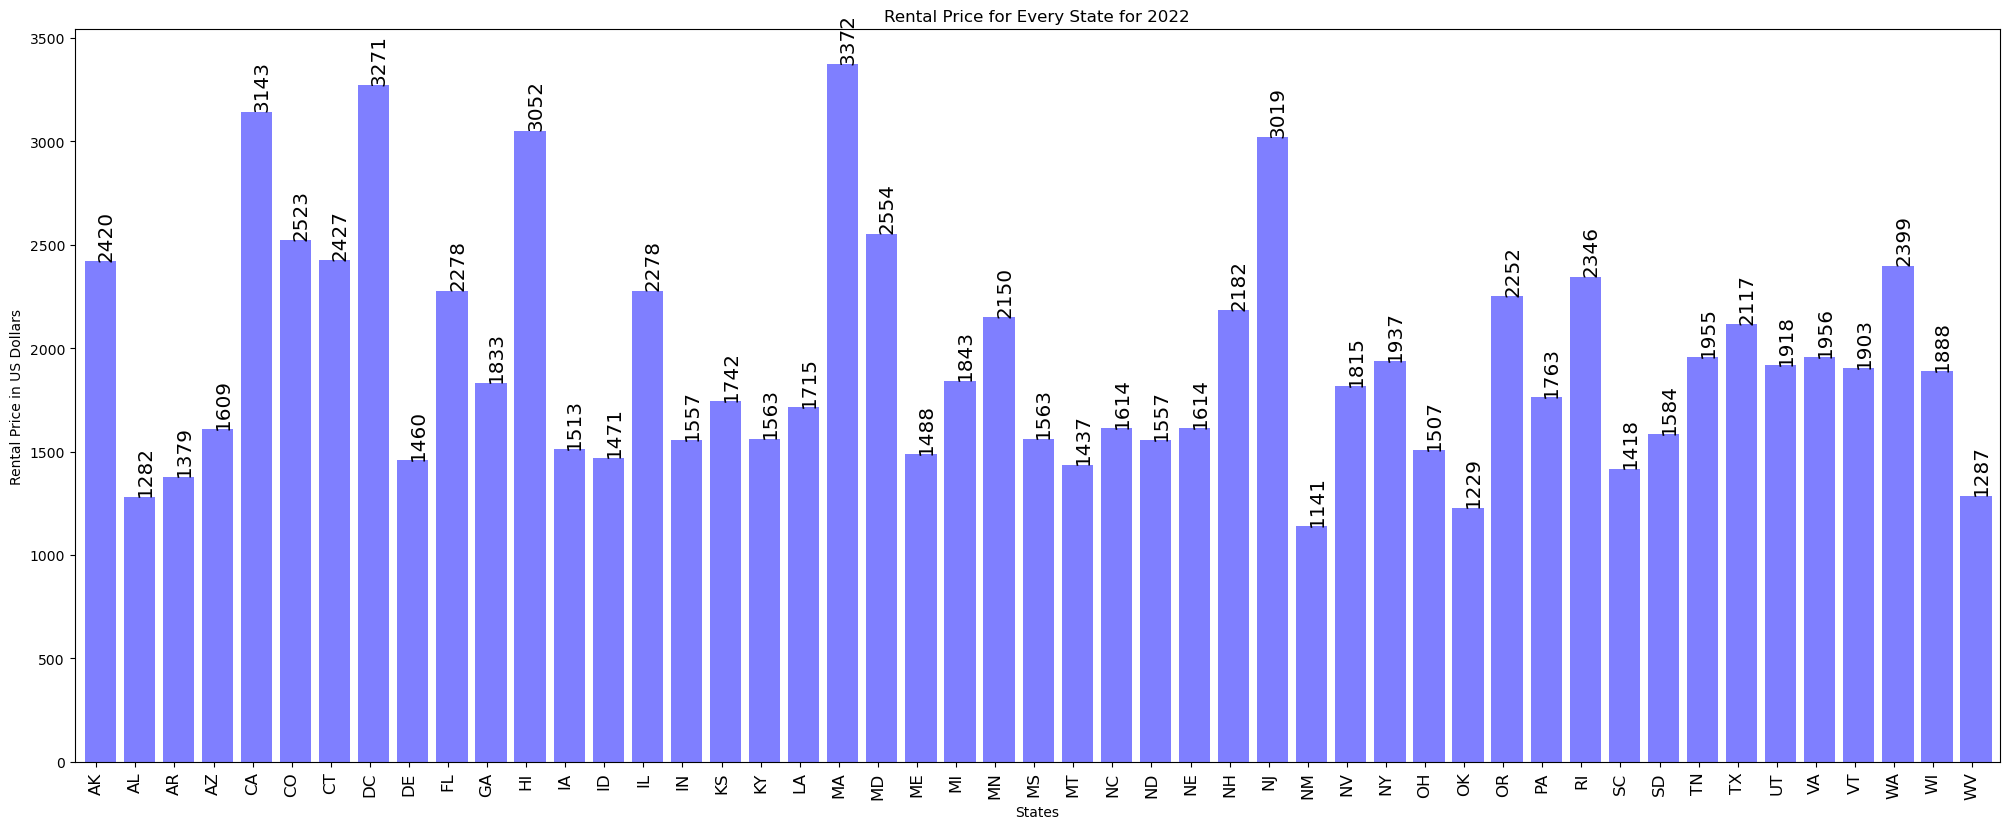

In [11]:
x_axis = np.arange(len(rental_df_clean))
year_value = "rental_" + value_for_year
tick_locations = [value + 0.3 for value in x_axis]
plt.figure(figsize=(20,8))
plt.xlim(-0.25, len(x_axis))
plt.bar(x_axis, rental_df_clean[year_value], color='b', alpha=0.5, align="edge")
plt.xticks(tick_locations , rental_df_clean["State"],rotation="vertical",size = 'large')
plt.tight_layout()
plt.title(f"Rental Price for Every State for {value_for_year}")
plt.xlabel("States")
plt.ylabel("Rental Price in US Dollars")
y = rental_df_clean[year_value]
for index, value in enumerate(y):
    plt.text(index + 0.3, value + 20,
             str(value), size = 'x-large',rotation="vertical")
plt.savefig("../Outputs/HUD_bar_chat.png")
plt.show()

In [12]:
# Determine if there are any potential outliers in the average rental in USA
quartiles = rental_df_clean[year_value].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of rental is: {lowerq}")
print(f"The upper quartile of rental is: {upperq}")
print(f"The interquartile range of rental is: {iqr}")
print(f"The the median of rental is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of rental is: 1557.0
The upper quartile of rental is: 2278.0
The interquartile range of rental is: 721.0
The the median of rental is: 1833.0 
Values below 475.5 could be outliers.
Values above 3359.5 could be outliers.


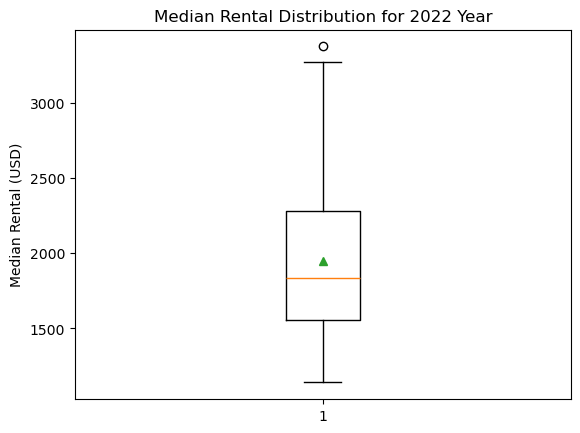

In [13]:
Median_Rental = rental_df_clean[year_value]

fig1, ax1 = plt.subplots()
ax1.set_title(f'Median Rental Distribution for {value_for_year} Year')
ax1.set_ylabel('Median Rental (USD)')
ax1.boxplot(Median_Rental, showmeans=True)
plt.savefig("../Outputs/rental_state_whiskey_plot")
plt.show()

In [14]:
# Set the 'State' to be our index for easy referencing of rows
if 'State' in rental_df_clean.columns:
    rental_df_clean.set_index("State", inplace=True)
else:
    print("Warning: 'State' column not found in DataFrame.")
rental_df_yearly = rental_df_clean.rename(columns={'rental_2022' : '2022', 'rental_2021': '2021',
       'rental_2020' : '2020', 'rental_2019' : '2019',
       'rental_2018' : '2018', 'rental_2017' : '2017',
       'rental_2016' : '2016', 'rental_2015' : '2015',
       'rental_2014': '2014', 'rental_2013' : '2013',
       'rental_2012': '2012'})


In [15]:
outlier_rental = rental_df_yearly[value_for_year].loc[(rental_df_yearly[value_for_year] < lower_bound) | (rental_df_yearly[value_for_year] > upper_bound)]
print(f' Outlier for {value_for_year} Year is : ' +  '\n' + f' {outlier_rental}' )

 Outlier for 2022 Year is : 
 State
MA    3372
Name: 2022, dtype: int64


In [16]:
# Determine if there are any potential outliers in the average homelesses in USA
year_value = "Overall Homeless, " + value_for_year
quartiles = homelesess_df_clean[year_value].quantile([.25,.5,.75])
lowerq = int(quartiles[0.25])
upperq = int(quartiles[0.75])
iqr = upperq-lowerq

print(f"The lower quartile of homelesess is: {lowerq}")
print(f"The upper quartile of homelesses is: {upperq}")
print(f"The interquartile range of homelesess is: {iqr}")
print(f"The the median of homelesess is: {int(quartiles[0.5])} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = int(upperq + (1.5*iqr))
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of homelesess is: 2283
The upper quartile of homelesses is: 9297
The interquartile range of homelesess is: 7014
The the median of homelesess is: 4410 
Values above 19818 could be outliers.


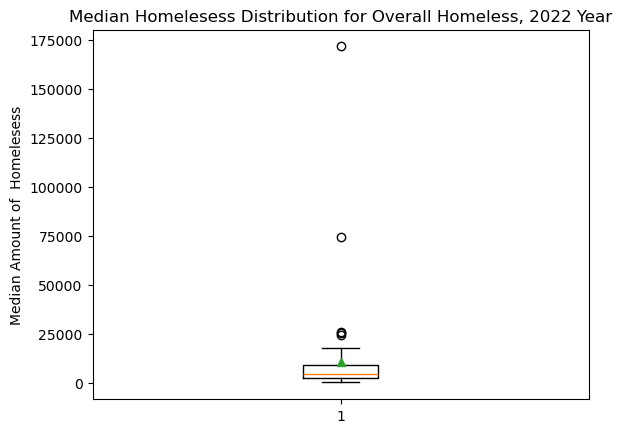

In [17]:
Median_Homelesess = homelesess_df_clean[year_value]
fig1, ax1 = plt.subplots()
ax1.set_title(f'Median Homelesess Distribution for {year_value} Year')
ax1.set_ylabel('Median Amount of  Homelesess')
ax1.boxplot(Median_Homelesess, showmeans=True)
plt.savefig("../Outputs/HUD_state_whiskey_plot")
plt.show()

In [18]:
# Set the 'State' to be our index for easy referencing of rows
if 'State' in homelesess_df_clean.columns:
    homelesess_df_clean.set_index("State", inplace=True)
else:
    print("Warning: 'State' column not found in DataFrame.")
    
homelesess_df_yearly = homelesess_df_clean.rename(columns={'Overall Homeless, 2022' : '2022', 'Overall Homeless, 2021': '2021',
       'Overall Homeless, 2020' : '2020', 'Overall Homeless, 2019' : '2019',
       'Overall Homeless, 2018' : '2018', 'Overall Homeless, 2017' : '2017',
       'Overall Homeless, 2016' : '2016', 'Overall Homeless, 2015' : '2015',
       'Overall Homeless, 2014': '2014', 'Overall Homeless, 2013' : '2013',
       'Overall Homeless, 2012': '2012'})
homelesess_df_yearly.to_csv('../Resources/HUD_States_Data.csv')

In [19]:
outlier_rental = homelesess_df_yearly[value_for_year].loc[(homelesess_df_yearly[value_for_year] < lower_bound) | (homelesess_df_yearly[value_for_year] > upper_bound)]
print(f' Outliers for {value_for_year} Year : ' +  '\n' +
                                   f'{outlier_rental}' )

 Outliers for 2022 Year : 
State
CA    171521
FL     25959
NY     74178
TX     24432
WA     25211
Name: 2022, dtype: object


In [20]:
year_array = [2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022]

# Specify the columns for which to calculate the rental average 
columns_to_sum = ['2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020',
       '2021', '2022']

# Calculate the sum for specific columns
specific_column_sums = rental_df_yearly[columns_to_sum].mean()

# Convert the result to a NumPy array
sums_array = np.array(specific_column_sums).round()
# Create a DataFrame from the arrays
usa_rental_df = pd.DataFrame({'Year': year_array , 'Average Rental in US': sums_array})

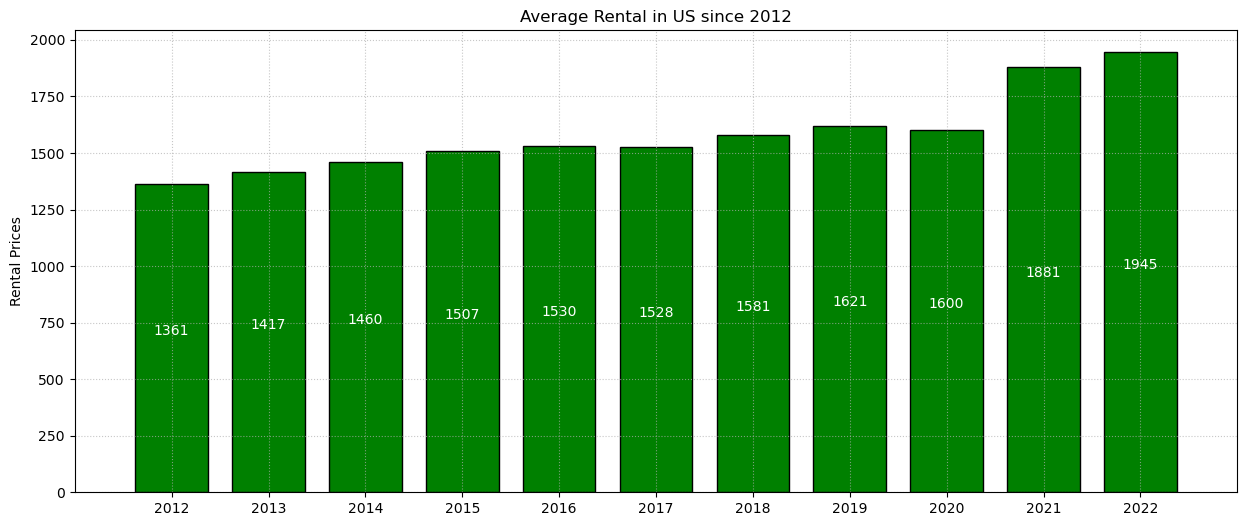

In [21]:
# Rental Change in the US since 2012
# Set values for X, Y axis and bar width
fig = plt.figure(figsize=(15,6))
x = usa_rental_df["Year"]
y = usa_rental_df["Average Rental in US"]
bar_width = 0.75
edgecolor = 'black'

# Plot Bar Chart        
bars = plt.bar(x, y, bar_width, color="g", ec=edgecolor, lw=1)

# Set Graph Properties
plt.ylabel('Rental Prices')
plt.title('Average Rental in US since 2012') 
plt.grid(True,linestyle=':', alpha=0.7)
plt.xlim(2011, x.max()+1)
plt.xticks(x, usa_rental_df["Year"])

# Set the bar value inside each bar
for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., 0.5*height,
                '%s' % (str(int(height))),
                ha='center', va='bottom', color="white")
# Save the figure
plt.savefig("../Outputs/rental_Summary.png")

# Show graph
plt.show()

In [22]:
# Calculate the sum for specific columns
specific_column_sums = homelesess_df_yearly[columns_to_sum].sum().loc[::-1]

# Convert the result to a NumPy array
sums_array = np.array(specific_column_sums)
# Create a DataFrame from the arrays
usa_homelesess_df = pd.DataFrame({'Year': year_array , 'Total Number of US homelesess': sums_array})


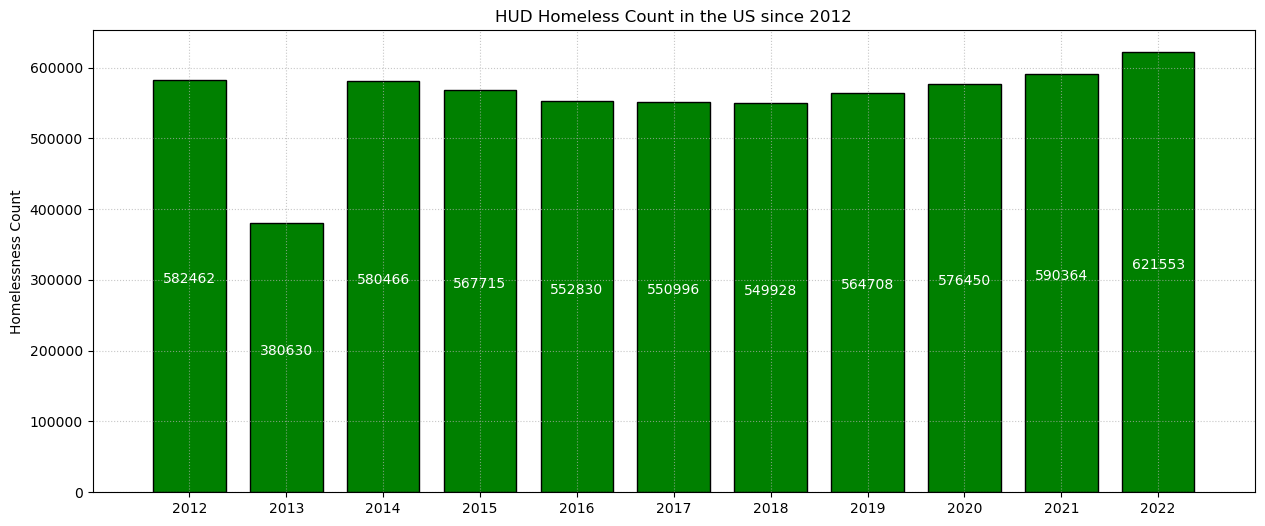

In [23]:
# Homelessness Change in the US since 2012
# Set values for X, Y axis and bar width
fig = plt.figure(figsize=(15,6))
x = usa_homelesess_df["Year"]
y = usa_homelesess_df["Total Number of US homelesess"]
bar_width = 0.75
edgecolor = 'black'

# Plot Bar Chart        
bars = plt.bar(x, y, bar_width, color="g", ec=edgecolor, lw=1)

# Set Graph Properties
plt.ylabel('Homelessness Count')
plt.title('HUD Homeless Count in the US since 2012') 
plt.grid(True,linestyle=':', alpha=0.7)
plt.xlim(2011, x.max()+1)
plt.xticks(x, usa_homelesess_df["Year"])

# Set the bar value inside each bar
for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., 0.5*height,
                '%s' % (str(int(height))),
                ha='center', va='bottom', color="white")
# Save the figure
plt.savefig("../Outputs/Homelesess_Summary.png")

# Show graph
plt.show()

Enter state code in two letters format:  CA


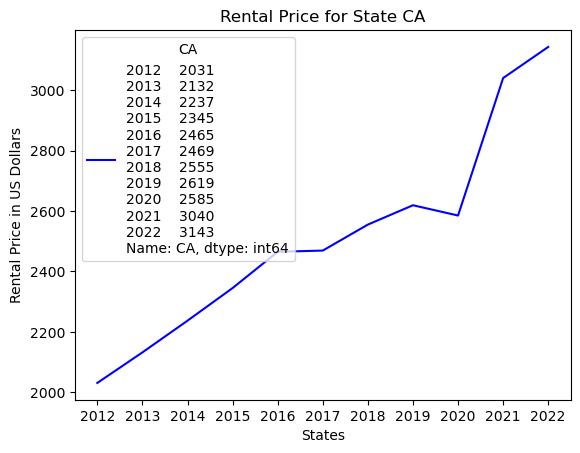

In [24]:
#Enter state code to plot graph
state_value = input('Enter state code in two letters format: ')
# Collect the homelesess number
average_rental = rental_df_yearly[[str(year) for year in range(2012, 2023)]].mean()

# Collect the years where data was collected
years = average_rental.keys()
# Plot the homelesess values for a single state
state_one = plt.plot(years, rental_df_yearly.loc[state_value,["2012","2013","2014","2015","2016","2017",
                                                                  "2018","2019","2020","2021","2022"]],
                                             color="blue",label=rental_df_yearly.loc[state_value])

# Create a legend for our chart
plt.legend(title = state_value, loc="best")
plt.title(f"Rental Price for State {state_value}")
plt.xlabel("States")
plt.ylabel("Rental Price in US Dollars")
plt.savefig("../Outputs/rental_state_graph")
# Show the chart
plt.show()

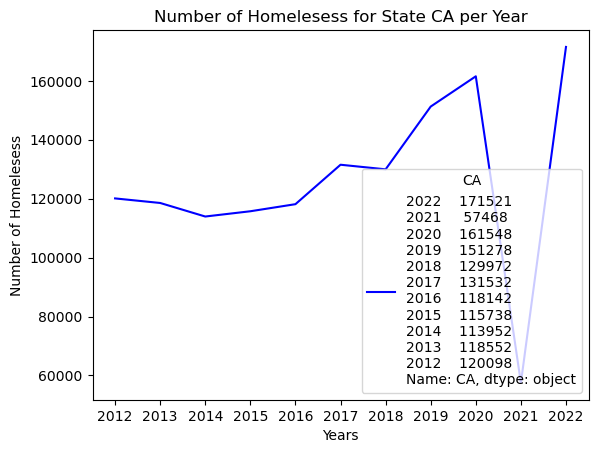

In [25]:
# Collect the homelesess number
average_homelesess = homelesess_df_yearly[[str(year) for year in range(2012, 2023)]].mean()

# Collect the years where data was collected
years = average_homelesess.keys()
# Plot the homelesess values for a single state
state_one = plt.plot(years, homelesess_df_yearly.loc[state_value,["2012","2013","2014","2015","2016","2017",
                                                                  "2018","2019","2020","2021","2022"]],
                                             color="blue",label=homelesess_df_yearly.loc[state_value])

# Create a legend for our chart
#plt.legend(handles=[state_one], loc="best")
plt.legend(title = state_value, loc="best")
plt.title(f"Number of Homelesess for State {state_value} per Year")
plt.xlabel("Years")
plt.ylabel("Number of Homelesess")
plt.savefig("../Outputs/HUD_state_graph")
# Show the chart
plt.show()